# CNN

In [19]:
import numpy as np
import pandas as pd
import random
import time 

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras import losses
from keras import regularizers
from keras.constraints import max_norm

from sklearn.cross_validation import cross_val_score

random.seed(7)

%matplotlib inline
import matplotlib.pyplot as plt

from src.utils import preprocess

In [2]:
X_train_pd = pd.read_csv('data/challenge_fichier_dentrees_dentrainement_challenge_nba/train.csv')
Y_train_pd = pd.read_csv('data/challenge_fichier_de_sortie_dentrainement_challenge_nba.csv', sep=';')
# X_test_pd = pd.read_csv('data/challenge_fichiers_dentrees_de_test_challenge_nba/test.csv')

In [3]:
X_train, Y_train, X_val, Y_val = preprocess(X_train_pd, Y_train_pd, 0.8)

In [4]:
nb_games_train = len(X_train)
nb_games_val = len(X_val)

# Reshpe data to create images

In [5]:
X_train = X_train.reshape((nb_games_train, 11, 1440, 1), order = 'F')
X_val = X_val.reshape((nb_games_val, 11, 1440, 1), order = 'F')

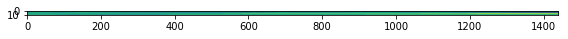

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(X_train[1, :].reshape(11,1440), interpolation='nearest')
plt.tight_layout()

In [7]:
Y_train = np_utils.to_categorical(Y_train, 2)
Y_val = np_utils.to_categorical(Y_val, 2)

# Training architectures

In [9]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 16, 
                 kernel_size = (11, 15), 
                 activation = 'relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Flatten())
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = conv_model.fit(X_train, Y_train, epochs = 100, batch_size = 32, verbose = True)
end = time.time()

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = conv_model.evaluate(X_val, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

Epoch 1/100
10060/10060 [==============================] - 8s 823us/step - loss: 0.6133 - acc: 0.6798
Epoch 2/100
10060/10060 [==============================] - 3s 255us/step - loss: 0.5834 - acc: 0.6845
Epoch 3/100
10060/10060 [==============================] - 3s 262us/step - loss: 0.5786 - acc: 0.6871
Epoch 4/100
10060/10060 [==============================] - 3s 274us/step - loss: 0.5737 - acc: 0.6917
Epoch 5/100
10060/10060 [==============================] - 3s 273us/step - loss: 0.5780 - acc: 0.6929
Epoch 6/100
10060/10060 [==============================] - 3s 266us/step - loss: 0.5794 - acc: 0.6861
Epoch 7/100
10060/10060 [==============================] - 3s 257us/step - loss: 0.5723 - acc: 0.6913
Epoch 8/100
10060/10060 [==============================] - 3s 259us/step - loss: 0.5796 - acc: 0.6867
Epoch 9/100
10060/10060 [==============================] - 3s 259us/step - loss: 0.5708 - acc: 0.6895
Epoch 10/100
10060/10060 [==============================] - 3s 258us/step - loss: 

In [10]:
conv_model.save('models/cnn1.h5')

In [11]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 16, 
                 kernel_size = (11, 15), 
                 activation = 'relu'))
conv_model.add(Dropout(0.75))
conv_model.add(Flatten())
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = conv_model.fit(X_train, Y_train, epochs = 200, batch_size = 32, verbose = True)
end = time.time()

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = conv_model.evaluate(X_val, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

Epoch 1/200
10060/10060 [==============================] - 3s 273us/step - loss: 0.6199 - acc: 0.6753
Epoch 2/200
10060/10060 [==============================] - 3s 258us/step - loss: 0.5899 - acc: 0.6843
Epoch 3/200
10060/10060 [==============================] - 3s 258us/step - loss: 0.5910 - acc: 0.6755
Epoch 4/200
10060/10060 [==============================] - 3s 257us/step - loss: 0.5917 - acc: 0.6723
Epoch 5/200
10060/10060 [==============================] - 3s 257us/step - loss: 0.5886 - acc: 0.6760
Epoch 6/200
10060/10060 [==============================] - 3s 258us/step - loss: 0.5877 - acc: 0.6755
Epoch 7/200
10060/10060 [==============================] - 3s 259us/step - loss: 0.5860 - acc: 0.6692
Epoch 8/200
10060/10060 [==============================] - 3s 258us/step - loss: 0.5854 - acc: 0.6818
Epoch 9/200
10060/10060 [==============================] - 3s 260us/step - loss: 0.5871 - acc: 0.6780
Epoch 10/200
10060/10060 [==============================] - 3s 293us/step - loss: 

10060/10060 [==============================] - 3s 257us/step - loss: 0.5149 - acc: 0.7378
Epoch 160/200
10060/10060 [==============================] - 3s 269us/step - loss: 0.5133 - acc: 0.7402
Epoch 161/200
10060/10060 [==============================] - 3s 263us/step - loss: 0.5167 - acc: 0.7417
Epoch 162/200
10060/10060 [==============================] - 3s 261us/step - loss: 0.5171 - acc: 0.7430
Epoch 163/200
10060/10060 [==============================] - 3s 257us/step - loss: 0.5129 - acc: 0.7460
Epoch 164/200
10060/10060 [==============================] - 3s 264us/step - loss: 0.5141 - acc: 0.7437
Epoch 165/200
10060/10060 [==============================] - 3s 261us/step - loss: 0.5144 - acc: 0.7445
Epoch 166/200
10060/10060 [==============================] - 3s 260us/step - loss: 0.5129 - acc: 0.7456
Epoch 167/200
10060/10060 [==============================] - 3s 262us/step - loss: 0.5136 - acc: 0.7480
Epoch 168/200
10060/10060 [==============================] - 3s 260us/step - l

In [12]:
conv_model.save('models/cnn2.h5')

In [13]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 16, 
                 kernel_size = (11, 10), 
                 activation = 'relu'))
conv_model.add(Dropout(0.75))
conv_model.add(Flatten())
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = conv_model.fit(X_train, Y_train, epochs = 200, batch_size = 32, verbose = True)
end = time.time()

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = conv_model.evaluate(X_val, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

conv_model.save('models/cnn3.h5')

Epoch 1/200
10060/10060 [==============================] - 3s 266us/step - loss: 0.6072 - acc: 0.6770
Epoch 2/200
10060/10060 [==============================] - 2s 247us/step - loss: 0.5773 - acc: 0.6895
Epoch 3/200
10060/10060 [==============================] - 2s 246us/step - loss: 0.5823 - acc: 0.6935
Epoch 4/200
10060/10060 [==============================] - 2s 245us/step - loss: 0.5766 - acc: 0.6959
Epoch 5/200
10060/10060 [==============================] - 2s 245us/step - loss: 0.5838 - acc: 0.6864
Epoch 6/200
10060/10060 [==============================] - 2s 241us/step - loss: 0.5788 - acc: 0.6875
Epoch 7/200
10060/10060 [==============================] - 2s 240us/step - loss: 0.5748 - acc: 0.6907
Epoch 8/200
10060/10060 [==============================] - 2s 244us/step - loss: 0.5741 - acc: 0.6904
Epoch 9/200
10060/10060 [==============================] - 2s 244us/step - loss: 0.5737 - acc: 0.6921
Epoch 10/200
10060/10060 [==============================] - 2s 245us/step - loss: 

10060/10060 [==============================] - 2s 239us/step - loss: 0.4908 - acc: 0.7582
Epoch 160/200
10060/10060 [==============================] - 3s 252us/step - loss: 0.4921 - acc: 0.7625
Epoch 161/200
10060/10060 [==============================] - 2s 245us/step - loss: 0.4897 - acc: 0.7636
Epoch 162/200
10060/10060 [==============================] - 2s 243us/step - loss: 0.4895 - acc: 0.7603
Epoch 163/200
10060/10060 [==============================] - 2s 247us/step - loss: 0.4892 - acc: 0.7591
Epoch 164/200
10060/10060 [==============================] - 3s 252us/step - loss: 0.4914 - acc: 0.7623
Epoch 165/200
10060/10060 [==============================] - 2s 245us/step - loss: 0.4942 - acc: 0.7572
Epoch 166/200
10060/10060 [==============================] - 3s 252us/step - loss: 0.4941 - acc: 0.7596
Epoch 167/200
10060/10060 [==============================] - 2s 248us/step - loss: 0.4965 - acc: 0.7633
Epoch 168/200
10060/10060 [==============================] - 2s 248us/step - l

In [14]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 16, 
                 kernel_size = (11, 10), 
                 activation = 'relu'))
conv_model.add(Dropout(0.75))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, activation = 'relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = conv_model.fit(X_train, Y_train, epochs = 200, batch_size = 32, verbose = True)
end = time.time()

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = conv_model.evaluate(X_val, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

conv_model.save('models/cnn4.h5')

Epoch 1/200
10060/10060 [==============================] - 3s 341us/step - loss: 0.6219 - acc: 0.6680
Epoch 2/200
10060/10060 [==============================] - 3s 315us/step - loss: 0.5912 - acc: 0.6842
Epoch 3/200
10060/10060 [==============================] - 3s 315us/step - loss: 0.5785 - acc: 0.6925
Epoch 4/200
10060/10060 [==============================] - 3s 315us/step - loss: 0.5749 - acc: 0.6986
Epoch 5/200
10060/10060 [==============================] - 3s 314us/step - loss: 0.5689 - acc: 0.7037
Epoch 6/200
10060/10060 [==============================] - 3s 317us/step - loss: 0.5701 - acc: 0.7049
Epoch 7/200
10060/10060 [==============================] - 3s 320us/step - loss: 0.5673 - acc: 0.7107
Epoch 8/200
10060/10060 [==============================] - 3s 329us/step - loss: 0.5671 - acc: 0.7084
Epoch 9/200
10060/10060 [==============================] - 3s 321us/step - loss: 0.5714 - acc: 0.7071
Epoch 10/200
10060/10060 [==============================] - 3s 319us/step - loss: 

10060/10060 [==============================] - 3s 321us/step - loss: 0.4726 - acc: 0.7761
Epoch 160/200
10060/10060 [==============================] - 3s 318us/step - loss: 0.4763 - acc: 0.7676
Epoch 161/200
10060/10060 [==============================] - 3s 313us/step - loss: 0.4632 - acc: 0.7816
Epoch 162/200
10060/10060 [==============================] - 3s 316us/step - loss: 0.4659 - acc: 0.7739
Epoch 163/200
10060/10060 [==============================] - 3s 321us/step - loss: 0.4741 - acc: 0.7764
Epoch 164/200
10060/10060 [==============================] - 3s 321us/step - loss: 0.4731 - acc: 0.7692
Epoch 165/200
10060/10060 [==============================] - 3s 320us/step - loss: 0.4592 - acc: 0.7769
Epoch 166/200
10060/10060 [==============================] - 3s 321us/step - loss: 0.4601 - acc: 0.7824
Epoch 167/200
10060/10060 [==============================] - 3s 319us/step - loss: 0.4625 - acc: 0.7809
Epoch 168/200
10060/10060 [==============================] - 3s 313us/step - l

In [15]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 16, 
                 kernel_size = (11, 10), 
                 activation = 'relu'))
MaxPooling2D(pool_size=(1, 2))
conv_model.add(Dropout(0.75))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, activation = 'relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = conv_model.fit(X_train, Y_train, epochs = 200, batch_size = 32, verbose = True)
end = time.time()

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = conv_model.evaluate(X_val, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

conv_model.save('models/cnn5.h5')

Epoch 1/200
10060/10060 [==============================] - 5s 480us/step - loss: 0.6126 - acc: 0.6835
Epoch 2/200
10060/10060 [==============================] - 3s 330us/step - loss: 0.5807 - acc: 0.6970
Epoch 3/200
10060/10060 [==============================] - 3s 319us/step - loss: 0.5779 - acc: 0.7038
Epoch 4/200
10060/10060 [==============================] - 3s 316us/step - loss: 0.5679 - acc: 0.7052
Epoch 5/200
10060/10060 [==============================] - 3s 316us/step - loss: 0.5693 - acc: 0.7093
Epoch 6/200
10060/10060 [==============================] - 3s 316us/step - loss: 0.5700 - acc: 0.7079
Epoch 7/200
10060/10060 [==============================] - 3s 316us/step - loss: 0.5655 - acc: 0.7029
Epoch 8/200
10060/10060 [==============================] - 3s 317us/step - loss: 0.5633 - acc: 0.7113
Epoch 9/200
10060/10060 [==============================] - 3s 317us/step - loss: 0.5625 - acc: 0.7146
Epoch 10/200
10060/10060 [==============================] - 3s 316us/step - loss: 

10060/10060 [==============================] - 3s 313us/step - loss: 0.4473 - acc: 0.7922
Epoch 160/200
10060/10060 [==============================] - 3s 312us/step - loss: 0.4478 - acc: 0.8000
Epoch 161/200
10060/10060 [==============================] - 3s 317us/step - loss: 0.4443 - acc: 0.7937
Epoch 162/200
10060/10060 [==============================] - 3s 321us/step - loss: 0.4462 - acc: 0.7970
Epoch 163/200
10060/10060 [==============================] - 3s 319us/step - loss: 0.4474 - acc: 0.7928
Epoch 164/200
10060/10060 [==============================] - 3s 320us/step - loss: 0.4498 - acc: 0.7895
Epoch 165/200
10060/10060 [==============================] - 3s 314us/step - loss: 0.4437 - acc: 0.7955
Epoch 166/200
10060/10060 [==============================] - 3s 320us/step - loss: 0.4457 - acc: 0.7940
Epoch 167/200
10060/10060 [==============================] - 3s 324us/step - loss: 0.4447 - acc: 0.7943
Epoch 168/200
10060/10060 [==============================] - 3s 314us/step - l

In [18]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 16, 
                 kernel_size = (11, 10),
                 strides = (1, 10),
                 activation = 'relu'))
conv_model.add(Dropout(0.75))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, activation = 'relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = conv_model.fit(X_train, Y_train, epochs = 200, batch_size = 32, verbose = True)
end = time.time()

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = conv_model.evaluate(X_val, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

conv_model.save('models/cnn6.h5')

Epoch 1/200
10060/10060 [==============================] - 2s 222us/step - loss: 0.6026 - acc: 0.6784
Epoch 2/200
10060/10060 [==============================] - 2s 165us/step - loss: 0.5744 - acc: 0.6986
Epoch 3/200
10060/10060 [==============================] - 2s 162us/step - loss: 0.5674 - acc: 0.7068
Epoch 4/200
10060/10060 [==============================] - 2s 167us/step - loss: 0.5660 - acc: 0.7081
Epoch 5/200
10060/10060 [==============================] - 2s 170us/step - loss: 0.5687 - acc: 0.7075
Epoch 6/200
10060/10060 [==============================] - 2s 169us/step - loss: 0.5665 - acc: 0.7091
Epoch 7/200
10060/10060 [==============================] - 2s 165us/step - loss: 0.5586 - acc: 0.7106
Epoch 8/200
10060/10060 [==============================] - 2s 164us/step - loss: 0.5651 - acc: 0.7080
Epoch 9/200
10060/10060 [==============================] - 2s 164us/step - loss: 0.5600 - acc: 0.7140
Epoch 10/200
10060/10060 [==============================] - 2s 166us/step - loss: 

10060/10060 [==============================] - 2s 173us/step - loss: 0.5363 - acc: 0.7330
Epoch 160/200
10060/10060 [==============================] - 2s 164us/step - loss: 0.5345 - acc: 0.7348
Epoch 161/200
10060/10060 [==============================] - 2s 173us/step - loss: 0.5351 - acc: 0.7355
Epoch 162/200
10060/10060 [==============================] - 2s 173us/step - loss: 0.5281 - acc: 0.7357
Epoch 163/200
10060/10060 [==============================] - 2s 174us/step - loss: 0.5271 - acc: 0.7378
Epoch 164/200
10060/10060 [==============================] - 2s 172us/step - loss: 0.5326 - acc: 0.7336
Epoch 165/200
10060/10060 [==============================] - 2s 170us/step - loss: 0.5355 - acc: 0.7327
Epoch 166/200
10060/10060 [==============================] - 2s 168us/step - loss: 0.5317 - acc: 0.7353
Epoch 167/200
10060/10060 [==============================] - 2s 160us/step - loss: 0.5349 - acc: 0.7303
Epoch 168/200
10060/10060 [==============================] - 2s 163us/step - l

# Second round of training

In [8]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 32, 
                 kernel_size = (11, 10), 
                 activation = 'relu',
                 strides = (1, 2)))
conv_model.add(Dropout(0.5))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, activation = 'relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = conv_model.fit(X_train, Y_train, epochs = 200, batch_size = 32, verbose = True)
end = time.time()

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = conv_model.evaluate(X_val, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

Epoch 1/200
10060/10060 [==============================] - 10s 999us/step - loss: 0.6184 - acc: 0.6586
Epoch 2/200
10060/10060 [==============================] - 3s 307us/step - loss: 0.5828 - acc: 0.6929
Epoch 3/200
10060/10060 [==============================] - 3s 305us/step - loss: 0.5802 - acc: 0.6934
Epoch 4/200
10060/10060 [==============================] - 3s 298us/step - loss: 0.5745 - acc: 0.6985
Epoch 5/200
10060/10060 [==============================] - 3s 292us/step - loss: 0.5750 - acc: 0.6962
Epoch 6/200
10060/10060 [==============================] - 3s 309us/step - loss: 0.5718 - acc: 0.6997
Epoch 7/200
10060/10060 [==============================] - 3s 304us/step - loss: 0.5708 - acc: 0.7041
Epoch 8/200
10060/10060 [==============================] - 3s 305us/step - loss: 0.5711 - acc: 0.6998
Epoch 9/200
10060/10060 [==============================] - 3s 299us/step - loss: 0.5773 - acc: 0.6969
Epoch 10/200
10060/10060 [==============================] - 3s 310us/step - loss:

10060/10060 [==============================] - 3s 290us/step - loss: 0.5045 - acc: 0.7452
Epoch 81/200
10060/10060 [==============================] - 3s 298us/step - loss: 0.4974 - acc: 0.7513
Epoch 82/200
10060/10060 [==============================] - 3s 298us/step - loss: 0.5040 - acc: 0.7472
Epoch 83/200
10060/10060 [==============================] - 3s 301us/step - loss: 0.5000 - acc: 0.7527
Epoch 84/200
10060/10060 [==============================] - 3s 308us/step - loss: 0.4996 - acc: 0.7522
Epoch 85/200
10060/10060 [==============================] - 3s 308us/step - loss: 0.5011 - acc: 0.7557
Epoch 86/200
10060/10060 [==============================] - 3s 309us/step - loss: 0.4986 - acc: 0.7493
Epoch 87/200
10060/10060 [==============================] - 3s 308us/step - loss: 0.4937 - acc: 0.7540
Epoch 88/200
10060/10060 [==============================] - 3s 310us/step - loss: 0.4963 - acc: 0.7472
Epoch 89/200
10060/10060 [==============================] - 3s 309us/step - loss: 0.48

10060/10060 [==============================] - 3s 300us/step - loss: 0.4421 - acc: 0.7843
Epoch 160/200
10060/10060 [==============================] - 3s 300us/step - loss: 0.4434 - acc: 0.7840
Epoch 161/200
10060/10060 [==============================] - 3s 300us/step - loss: 0.4362 - acc: 0.7876
Epoch 162/200
10060/10060 [==============================] - 3s 300us/step - loss: 0.4409 - acc: 0.7844
Epoch 163/200
10060/10060 [==============================] - 3s 298us/step - loss: 0.4320 - acc: 0.7877
Epoch 164/200
10060/10060 [==============================] - 3s 300us/step - loss: 0.4360 - acc: 0.7897
Epoch 165/200
10060/10060 [==============================] - 3s 300us/step - loss: 0.4284 - acc: 0.7933
Epoch 166/200
10060/10060 [==============================] - 3s 299us/step - loss: 0.4327 - acc: 0.7839
Epoch 167/200
10060/10060 [==============================] - 3s 300us/step - loss: 0.4251 - acc: 0.7951
Epoch 168/200
10060/10060 [==============================] - 3s 300us/step - l

In [9]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 48, 
                 kernel_size = (11, 10), 
                 activation = 'relu',
                 strides = (1, 2)))
conv_model.add(Dropout(0.5))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, activation = 'relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = conv_model.fit(X_train, Y_train, epochs = 200, batch_size = 32, verbose = True)
end = time.time()

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = conv_model.evaluate(X_val, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

Epoch 1/200
10060/10060 [==============================] - 4s 389us/step - loss: 0.6140 - acc: 0.6630
Epoch 2/200
10060/10060 [==============================] - 4s 374us/step - loss: 0.5874 - acc: 0.6953
Epoch 3/200
10060/10060 [==============================] - 4s 373us/step - loss: 0.5819 - acc: 0.6879
Epoch 4/200
10060/10060 [==============================] - 4s 370us/step - loss: 0.5768 - acc: 0.6940
Epoch 5/200
10060/10060 [==============================] - 4s 369us/step - loss: 0.5803 - acc: 0.6981
Epoch 6/200
10060/10060 [==============================] - 4s 372us/step - loss: 0.5728 - acc: 0.7033
Epoch 7/200
10060/10060 [==============================] - 4s 404us/step - loss: 0.5681 - acc: 0.6981
Epoch 8/200
10060/10060 [==============================] - 4s 375us/step - loss: 0.5659 - acc: 0.7102
Epoch 9/200
10060/10060 [==============================] - 4s 373us/step - loss: 0.5661 - acc: 0.7097
Epoch 10/200
10060/10060 [==============================] - 4s 372us/step - loss: 

10060/10060 [==============================] - 4s 378us/step - loss: 0.4885 - acc: 0.7605
Epoch 81/200
10060/10060 [==============================] - 4s 383us/step - loss: 0.4909 - acc: 0.7596
Epoch 82/200
10060/10060 [==============================] - 4s 392us/step - loss: 0.4892 - acc: 0.7585
Epoch 83/200
10060/10060 [==============================] - 4s 384us/step - loss: 0.4827 - acc: 0.7572
Epoch 84/200
10060/10060 [==============================] - 4s 374us/step - loss: 0.4847 - acc: 0.7626
Epoch 85/200
10060/10060 [==============================] - 4s 382us/step - loss: 0.4846 - acc: 0.7642
Epoch 86/200
10060/10060 [==============================] - 4s 385us/step - loss: 0.4871 - acc: 0.7578
Epoch 87/200
10060/10060 [==============================] - 4s 371us/step - loss: 0.4865 - acc: 0.7614
Epoch 88/200
10060/10060 [==============================] - 4s 374us/step - loss: 0.4772 - acc: 0.7687
Epoch 89/200
10060/10060 [==============================] - 4s 383us/step - loss: 0.48

10060/10060 [==============================] - 4s 377us/step - loss: 0.4319 - acc: 0.7949
Epoch 160/200
10060/10060 [==============================] - 4s 370us/step - loss: 0.4407 - acc: 0.7844
Epoch 161/200
10060/10060 [==============================] - 4s 366us/step - loss: 0.4340 - acc: 0.7901
Epoch 162/200
10060/10060 [==============================] - 4s 366us/step - loss: 0.4270 - acc: 0.7915
Epoch 163/200
10060/10060 [==============================] - 4s 368us/step - loss: 0.4311 - acc: 0.7914
Epoch 164/200
10060/10060 [==============================] - 4s 367us/step - loss: 0.4301 - acc: 0.7946
Epoch 165/200
10060/10060 [==============================] - 4s 369us/step - loss: 0.4285 - acc: 0.7932
Epoch 166/200
10060/10060 [==============================] - 4s 372us/step - loss: 0.4239 - acc: 0.7941
Epoch 167/200
10060/10060 [==============================] - 4s 379us/step - loss: 0.4348 - acc: 0.7923
Epoch 168/200
10060/10060 [==============================] - 4s 383us/step - l

In [16]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 32, 
                 kernel_size = (11, 10), 
                 activation = 'relu',
                 strides = (1, 2)))
conv_model.add(Dropout(0.7))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, 
                     activation = 'relu'))
conv_model.add(Dropout(0.7))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = conv_model.fit(X_train, Y_train, epochs = 200, batch_size = 32, verbose = True)
end = time.time()

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = conv_model.evaluate(X_val, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

Epoch 1/200
10060/10060 [==============================] - 3s 342us/step - loss: 0.6313 - acc: 0.6672
Epoch 2/200
10060/10060 [==============================] - 3s 299us/step - loss: 0.5940 - acc: 0.6901
Epoch 3/200
10060/10060 [==============================] - 3s 303us/step - loss: 0.5912 - acc: 0.6918
Epoch 4/200
10060/10060 [==============================] - 3s 310us/step - loss: 0.5904 - acc: 0.6857
Epoch 5/200
10060/10060 [==============================] - 3s 309us/step - loss: 0.5958 - acc: 0.6909
Epoch 6/200
10060/10060 [==============================] - 3s 295us/step - loss: 0.5825 - acc: 0.6944
Epoch 7/200
10060/10060 [==============================] - 3s 304us/step - loss: 0.5900 - acc: 0.6949
Epoch 8/200
10060/10060 [==============================] - 3s 305us/step - loss: 0.5777 - acc: 0.6927
Epoch 9/200
10060/10060 [==============================] - 3s 308us/step - loss: 0.5793 - acc: 0.6997
Epoch 10/200
10060/10060 [==============================] - 3s 306us/step - loss: 

10060/10060 [==============================] - 3s 296us/step - loss: 0.5523 - acc: 0.7185
Epoch 81/200
10060/10060 [==============================] - 3s 295us/step - loss: 0.5537 - acc: 0.7228
Epoch 82/200
10060/10060 [==============================] - 3s 294us/step - loss: 0.5526 - acc: 0.7207
Epoch 83/200
10060/10060 [==============================] - 3s 297us/step - loss: 0.5492 - acc: 0.7223
Epoch 84/200
10060/10060 [==============================] - 3s 295us/step - loss: 0.5561 - acc: 0.7188
Epoch 85/200
10060/10060 [==============================] - 3s 295us/step - loss: 0.5514 - acc: 0.7195
Epoch 86/200
10060/10060 [==============================] - 3s 295us/step - loss: 0.5531 - acc: 0.7208
Epoch 87/200
10060/10060 [==============================] - 3s 296us/step - loss: 0.5526 - acc: 0.7212
Epoch 88/200
10060/10060 [==============================] - 3s 295us/step - loss: 0.5497 - acc: 0.7219
Epoch 89/200
10060/10060 [==============================] - 3s 296us/step - loss: 0.55

10060/10060 [==============================] - 3s 292us/step - loss: 0.5402 - acc: 0.7294
Epoch 160/200
10060/10060 [==============================] - 3s 293us/step - loss: 0.5341 - acc: 0.7269
Epoch 161/200
10060/10060 [==============================] - 3s 292us/step - loss: 0.5370 - acc: 0.7321
Epoch 162/200
10060/10060 [==============================] - 3s 292us/step - loss: 0.5353 - acc: 0.7336
Epoch 163/200
10060/10060 [==============================] - 3s 292us/step - loss: 0.5384 - acc: 0.7334
Epoch 164/200
10060/10060 [==============================] - 3s 292us/step - loss: 0.5409 - acc: 0.7274
Epoch 165/200
10060/10060 [==============================] - 3s 303us/step - loss: 0.5342 - acc: 0.7309
Epoch 166/200
10060/10060 [==============================] - 3s 307us/step - loss: 0.5375 - acc: 0.7346
Epoch 167/200
10060/10060 [==============================] - 3s 306us/step - loss: 0.5320 - acc: 0.7395
Epoch 168/200
10060/10060 [==============================] - 3s 312us/step - l

In [17]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 32, 
                 kernel_size = (11, 10), 
                 activation = 'relu',
                 strides = (1, 2)))
conv_model.add(Dropout(0.6))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, 
                     activation = 'relu'))
conv_model.add(Dropout(0.6))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = conv_model.fit(X_train, Y_train, epochs = 200, batch_size = 32, verbose = True)
end = time.time()

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = conv_model.evaluate(X_val, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

Epoch 1/200
10060/10060 [==============================] - 3s 336us/step - loss: 0.6254 - acc: 0.6496
Epoch 2/200
10060/10060 [==============================] - 3s 298us/step - loss: 0.6006 - acc: 0.6688
Epoch 3/200
10060/10060 [==============================] - 3s 298us/step - loss: 0.5952 - acc: 0.6732
Epoch 4/200
10060/10060 [==============================] - 3s 296us/step - loss: 0.5929 - acc: 0.6834
Epoch 5/200
10060/10060 [==============================] - 3s 301us/step - loss: 0.5872 - acc: 0.6908
Epoch 6/200
10060/10060 [==============================] - 3s 300us/step - loss: 0.5874 - acc: 0.6868
Epoch 7/200
10060/10060 [==============================] - 3s 295us/step - loss: 0.5818 - acc: 0.6916
Epoch 8/200
10060/10060 [==============================] - 3s 295us/step - loss: 0.5796 - acc: 0.7011
Epoch 9/200
10060/10060 [==============================] - 3s 295us/step - loss: 0.5713 - acc: 0.6954
Epoch 10/200
10060/10060 [==============================] - 3s 294us/step - loss: 

10060/10060 [==============================] - 3s 293us/step - loss: 0.5309 - acc: 0.7363
Epoch 81/200
10060/10060 [==============================] - 3s 293us/step - loss: 0.5363 - acc: 0.7315
Epoch 82/200
10060/10060 [==============================] - 3s 292us/step - loss: 0.5375 - acc: 0.7322
Epoch 83/200
10060/10060 [==============================] - 3s 293us/step - loss: 0.5363 - acc: 0.7365
Epoch 84/200
10060/10060 [==============================] - 3s 294us/step - loss: 0.5369 - acc: 0.7339
Epoch 85/200
10060/10060 [==============================] - 3s 293us/step - loss: 0.5434 - acc: 0.7281
Epoch 86/200
10060/10060 [==============================] - 3s 294us/step - loss: 0.5344 - acc: 0.7331
Epoch 87/200
10060/10060 [==============================] - 3s 293us/step - loss: 0.5277 - acc: 0.7321
Epoch 88/200
10060/10060 [==============================] - 3s 293us/step - loss: 0.5318 - acc: 0.7351
Epoch 89/200
10060/10060 [==============================] - 3s 294us/step - loss: 0.52

10060/10060 [==============================] - 3s 293us/step - loss: 0.4883 - acc: 0.7653
Epoch 160/200
10060/10060 [==============================] - 3s 295us/step - loss: 0.4942 - acc: 0.7638
Epoch 161/200
10060/10060 [==============================] - 3s 294us/step - loss: 0.4894 - acc: 0.7646
Epoch 162/200
10060/10060 [==============================] - 3s 293us/step - loss: 0.4917 - acc: 0.7638
Epoch 163/200
10060/10060 [==============================] - 3s 293us/step - loss: 0.4868 - acc: 0.7623
Epoch 164/200
10060/10060 [==============================] - 3s 293us/step - loss: 0.4918 - acc: 0.7642
Epoch 165/200
10060/10060 [==============================] - 3s 293us/step - loss: 0.4864 - acc: 0.7629
Epoch 166/200
10060/10060 [==============================] - 3s 292us/step - loss: 0.4898 - acc: 0.7694
Epoch 167/200
10060/10060 [==============================] - 3s 293us/step - loss: 0.4878 - acc: 0.7711
Epoch 168/200
10060/10060 [==============================] - 3s 293us/step - l

In [20]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 32, 
                 kernel_size = (11, 10), 
                 activation = 'relu',
                 strides = (1, 2)))
conv_model.add(Dropout(0.5))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, 
                     activation = 'relu', 
                     kernel_constraint=max_norm(4.)))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = conv_model.fit(X_train, Y_train, epochs = 200, batch_size = 32, verbose = True)
end = time.time()

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = conv_model.evaluate(X_val, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

Epoch 1/200
10060/10060 [==============================] - 4s 375us/step - loss: 0.6144 - acc: 0.6783
Epoch 2/200
10060/10060 [==============================] - 3s 330us/step - loss: 0.5872 - acc: 0.6946
Epoch 3/200
10060/10060 [==============================] - 3s 322us/step - loss: 0.5781 - acc: 0.6921
Epoch 4/200
10060/10060 [==============================] - 3s 307us/step - loss: 0.5784 - acc: 0.6951
Epoch 5/200
10060/10060 [==============================] - 3s 308us/step - loss: 0.5718 - acc: 0.7009
Epoch 6/200
10060/10060 [==============================] - 3s 307us/step - loss: 0.5737 - acc: 0.7019
Epoch 7/200
10060/10060 [==============================] - 3s 306us/step - loss: 0.5725 - acc: 0.7009
Epoch 8/200
10060/10060 [==============================] - 3s 306us/step - loss: 0.5785 - acc: 0.6980
Epoch 9/200
10060/10060 [==============================] - 3s 309us/step - loss: 0.5732 - acc: 0.7014
Epoch 10/200
10060/10060 [==============================] - 3s 307us/step - loss: 

10060/10060 [==============================] - 3s 305us/step - loss: 0.5406 - acc: 0.7229
Epoch 81/200
10060/10060 [==============================] - 3s 305us/step - loss: 0.5356 - acc: 0.7297
Epoch 82/200
10060/10060 [==============================] - 3s 305us/step - loss: 0.5374 - acc: 0.7257
Epoch 83/200
10060/10060 [==============================] - 3s 304us/step - loss: 0.5380 - acc: 0.7269
Epoch 84/200
10060/10060 [==============================] - 3s 305us/step - loss: 0.5352 - acc: 0.7291
Epoch 85/200
10060/10060 [==============================] - 3s 305us/step - loss: 0.5376 - acc: 0.7276
Epoch 86/200
10060/10060 [==============================] - 3s 304us/step - loss: 0.5351 - acc: 0.7269
Epoch 87/200
10060/10060 [==============================] - 3s 304us/step - loss: 0.5336 - acc: 0.7279
Epoch 88/200
10060/10060 [==============================] - 3s 304us/step - loss: 0.5368 - acc: 0.7238
Epoch 89/200
10060/10060 [==============================] - 3s 304us/step - loss: 0.53

10060/10060 [==============================] - 3s 318us/step - loss: 0.5178 - acc: 0.7410
Epoch 160/200
10060/10060 [==============================] - 3s 318us/step - loss: 0.5159 - acc: 0.7428
Epoch 161/200
10060/10060 [==============================] - 3s 318us/step - loss: 0.5151 - acc: 0.7431
Epoch 162/200
10060/10060 [==============================] - 3s 318us/step - loss: 0.5210 - acc: 0.7452
Epoch 163/200
10060/10060 [==============================] - 3s 317us/step - loss: 0.5174 - acc: 0.7442
Epoch 164/200
10060/10060 [==============================] - 3s 318us/step - loss: 0.5169 - acc: 0.7434
Epoch 165/200
10060/10060 [==============================] - 3s 318us/step - loss: 0.5110 - acc: 0.7464
Epoch 166/200
10060/10060 [==============================] - 3s 317us/step - loss: 0.5174 - acc: 0.7413
Epoch 167/200
10060/10060 [==============================] - 3s 305us/step - loss: 0.5164 - acc: 0.7487
Epoch 168/200
10060/10060 [==============================] - 3s 303us/step - l